# Intro

## Libraries

In [1]:
import os
import glob
from datetime import datetime

import pandas as pd
import numpy as np
# import pandas_profiling as pdprof

In [2]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
%matplotlib inline

import seaborn as sns
# sns.set_theme()
sns.set_style()

## Input files

In [3]:
MSC_2018 = pd.read_excel("MSC_2018.xlsx")
MSC_2020 = pd.read_excel("ConsumosCI2020_MSC.xlsx", header=9, sheet_name="2020")

# Pre-processing

In [4]:
# describe dataset (columns of munbers). For a description of every column, add include='all' within the brackets
MSC_2020.describe() 

,Segment,Consolidated AUX,Consolidated BOILER,Estimated Power,Consolidated Port Stay (Hours)
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,5727.468354,7.538525,3.038411,34266.024166,23.896002
std,4650.855259,9.342877,3.338506,42467.620479,20.181103
min,900.000000,0.000000,0.000000,0.000000,0.000000
25%,1800.000000,1.800000,0.900000,8181.818182,13.500000
50%,5000.000000,4.300000,2.100000,19545.454545,19.800000
75%,8500.000000,9.702500,4.085000,44102.272727,29.925000
max,23000.000000,92.990000,41.900000,422681.818182,386.400000


In [5]:
# only port of Valencia
MSC_2020 = MSC_2020[MSC_2020.Port=='VALENCIA']

# data validation
# drop stops of 0 hours (error)
MSC_2020 = MSC_2020[MSC_2020['Consolidated Port Stay (Hours)']!=0]
# drop stops with too high power demand (error)
MSC_2020 = MSC_2020[MSC_2020['Average Power']<10000]
# convert Power at berth from 'object' to 'number'
MSC_2020['Average Power'] = MSC_2020['Average Power'].astype('float32')

In [6]:
# more data cleaning
# Change YES* to YES

MSC_2018['Shore power equipped'][MSC_2018['Shore power equipped']=='YES*']='YES'

<ipython-input-6-c75eccd41d40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSC_2018['Shore power equipped'][MSC_2018['Shore power equipped']=='YES*']='YES'


# Analysis MSC stops in 2018

## General description 

In [7]:
# show first 5 rows
MSC_2018.head()

,Unnamed: 0,Message Date,Vessel,Shore power equipped,Retrofitted,California Commissioned,Segment (TEUs),Port,Country,Consolidated AUX,...,Muelle,Factor_carga,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,TotalPower,GT
0,0,2018-01-06 02:06:00,VEGA SIGMA,NO,-,-,1100,VALENCIA,SPAIN,1.52,...,PRINCIPE FELIPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9730,9940
1,1,2018-01-03 09:00:00,MSC CAMILLE,YES,-,NO,14000,VALENCIA,SPAIN,10.50,...,PRINCIPE FELIPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72240,153092
2,2,2018-01-04 10:18:00,MSC AJACCIO,YES,-,-,9500,VALENCIA,SPAIN,17.00,...,TRANSVERSAL COSTA,NaN,NaN,Clase,Frecuencia,Clase,Frecuencia,NaN,52290,95139
3,3,2018-01-04 17:06:00,MSC MELINE,YES,-,-,8500,VALENCIA,SPAIN,19.72,...,PRINCIPE FELIPE,NaN,0.0,0,0,0-6,2,NaN,47430,95497
4,4,2018-01-05 14:00:00,E.R. YOKOHAMA,NO,-,-,7500,VALENCIA,SPAIN,15.50,...,PRINCIPE FELIPE,NaN,6.0,5,1,6-12,34,NaN,68640,83133


In [8]:
# show last 3 rows
MSC_2018.tail(3)

,Unnamed: 0,Message Date,Vessel,Shore power equipped,Retrofitted,California Commissioned,Segment (TEUs),Port,Country,Consolidated AUX,...,Muelle,Factor_carga,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,TotalPower,GT
1116,1116,2018-12-31 13:54:00,MSC RACHELE,NO,-,-,8500,VALENCIA,SPAIN,8.00,...,MUELLE DE COSTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68666,90745
1117,1117,2018-12-31 06:54:00,MSC DON GIOVANNI,NO,-,-,2500,VALENCIA,SPAIN,1.31,...,TRANSVERSAL COSTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16860,29181
1118,1118,2018-12-31 18:24:00,MSC FABIENNE,YES,YES - Missing AMP Container,YES,5000,VALENCIA,SPAIN,3.68,...,TRANSVERSAL COSTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41107,54774


In [9]:
# show data by integer location
MSC_2018.iloc[1,2]

'MSC CAMILLE'

In [10]:
MSC_2018.iloc[0:2,2:9]

,Vessel,Shore power equipped,Retrofitted,California Commissioned,Segment (TEUs),Port,Country
0,VEGA SIGMA,NO,-,-,1100,VALENCIA,SPAIN
1,MSC CAMILLE,YES,-,NO,14000,VALENCIA,SPAIN


In [11]:
# show by column
MSC_2018.Vessel[0:4]

0     VEGA SIGMA
1    MSC CAMILLE
2    MSC AJACCIO
3     MSC MELINE
Name: Vessel, dtype: object

In [12]:
MSC_2018['Segment (TEUs)']

0        1100
1       14000
2        9500
3        8500
4        7500
        ...  
1114     9500
1115     5500
1116     8500
1117     2500
1118     5000
Name: Segment (TEUs), Length: 1119, dtype: int64

In [13]:
# show different columns (notice double [[]] )
MSC_2018[['Vessel','Muelle','Average Power']]

,Vessel,Muelle,Average Power
0,VEGA SIGMA,PRINCIPE FELIPE,282.004
1,MSC CAMILLE,PRINCIPE FELIPE,1821.65
2,MSC AJACCIO,TRANSVERSAL COSTA,1705.8
3,MSC MELINE,PRINCIPE FELIPE,3421.24
4,E.R. YOKOHAMA,PRINCIPE FELIPE,3420.12
...,...,...,...
1114,MSC JOANNA,PRINCIPE FELIPE,1224.56
1115,MSC DYMPHNA,PRINCIPE FELIPE,1355.3
1116,MSC RACHELE,MUELLE DE COSTA,1818.18
1117,MSC DON GIOVANNI,TRANSVERSAL COSTA,601.469


In [14]:
# show column names
MSC_2018.columns

Index(['Unnamed: 0', 'Message Date', 'Vessel', 'Shore power equipped',
       'Retrofitted', 'California Commissioned', 'Segment (TEUs)', 'Port',
       'Country', 'Consolidated AUX', 'Consolidated BOILER', 'Estimated Power',
       'Consumo quitando tiempo de conexión/desconexión', 'Average Power',
       'Consolidated Port Stay (Hours)', 'LOA', 'IMO', 'FH. Amarre Calc',
       'Amarre calculado (horas)', 'FH. Desamarre Calc',
       'Duración fondeado en Business Objects', 'Potencia_kW', 'Muelle',
       'Factor_carga', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'TotalPower', 'GT'],
      dtype='object')

In [15]:
# drop columns
MSC_2018.drop(['Unnamed: 0','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
              'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis=1)  # axis 1 is columns, axis 0 is rows

# or

# MSC_2018.drop(columns = ['Unnamed: 0','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
#               'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'])

,Message Date,Vessel,Shore power equipped,Retrofitted,California Commissioned,Segment (TEUs),Port,Country,Consolidated AUX,Consolidated BOILER,...,IMO,FH. Amarre Calc,Amarre calculado (horas),FH. Desamarre Calc,Duración fondeado en Business Objects,Potencia_kW,Muelle,Factor_carga,TotalPower,GT
0,2018-01-06 02:06:00,VEGA SIGMA,NO,-,-,1100,VALENCIA,SPAIN,1.52,0.69,...,9330240,2018-01-01 20:48:00,25.083333,2018-01-02 21:53:00,76.5167,275.445485,PRINCIPE FELIPE,NaN,9730,9940
1,2018-01-03 09:00:00,MSC CAMILLE,YES,-,NO,14000,VALENCIA,SPAIN,10.50,6.50,...,9404651,2018-01-02 05:28:00,27.500000,2018-01-03 08:58:00,-,1735.537190,PRINCIPE FELIPE,NaN,72240,153092
2,2018-01-04 10:18:00,MSC AJACCIO,YES,-,-,9500,VALENCIA,SPAIN,17.00,6.00,...,9605267,2018-01-02 12:03:00,40.166667,2018-01-04 04:13:00,-,1923.802339,TRANSVERSAL COSTA,NaN,52290,95139
3,2018-01-04 17:06:00,MSC MELINE,YES,-,-,8500,VALENCIA,SPAIN,19.72,2.60,...,9702077,2018-01-03 13:37:00,27.083333,2018-01-04 16:42:00,-,3309.650350,PRINCIPE FELIPE,NaN,47430,95497
4,2018-01-05 14:00:00,E.R. YOKOHAMA,NO,-,-,7500,VALENCIA,SPAIN,15.50,3.90,...,9285665,2018-01-04 16:15:00,21.833333,2018-01-05 14:05:00,-,3226.925746,PRINCIPE FELIPE,NaN,68640,83133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2018-12-31 12:00:00,MSC JOANNA,NO,-,-,9500,VALENCIA,SPAIN,7.22,5.34,...,9304435,2018-12-30 07:54:00,28.083333,2018-12-31 11:59:00,-,1168.599946,PRINCIPE FELIPE,NaN,68520,107849
1115,2018-12-31 13:18:00,MSC DYMPHNA,NO,-,-,5500,VALENCIA,SPAIN,6.50,4.70,...,9110391,2018-12-30 14:34:00,22.333333,2018-12-31 12:54:00,-,1322.930801,PRINCIPE FELIPE,NaN,54814,64054
1116,2018-12-31 13:54:00,MSC RACHELE,NO,-,-,8500,VALENCIA,SPAIN,8.00,5.00,...,9290282,2018-12-30 17:03:00,20.416667,2018-12-31 13:28:00,-,1781.076067,MUELLE DE COSTA,NaN,68666,90745
1117,2018-12-31 06:54:00,MSC DON GIOVANNI,NO,-,-,2500,VALENCIA,SPAIN,1.31,0.65,...,9102746,2018-12-30 20:04:00,10.500000,2018-12-31 06:34:00,-,567.099567,TRANSVERSAL COSTA,NaN,16860,29181


(array([300.,  43.,  44.,  83.,  95.,  32.,  98.,  16., 196., 107.,   0.,
          3.,   0.,   5.,  76.,   0.,  20.,   0.,   0.,   1.]),
 array([  900.,  1805.,  2710.,  3615.,  4520.,  5425.,  6330.,  7235.,
         8140.,  9045.,  9950., 10855., 11760., 12665., 13570., 14475.,
        15380., 16285., 17190., 18095., 19000.]),
 <BarContainer object of 20 artists>)

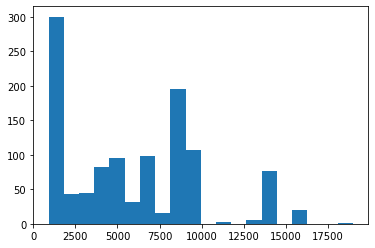

In [16]:
# plot histogram of TEU
plt.hist(MSC_2018['Segment (TEUs)'], bins = 20)

In [17]:
# define function of violin plot

def violin(a,b,c):
    fig, ax = plt.subplots(3, 1, sharex=False, figsize=(15,10))
    sns.violinplot(x=a, ax=ax[0])
#     ax[0].set_title('TEU')
    sns.violinplot(x=b, ax=ax[1])
#     ax[1].set_title('EnginePower')
    sns.violinplot(x=c, ax=ax[2])
#     ax[2].set_title('GT')
    fig.suptitle('MSC', fontsize=16)
    ax[0].grid(True)
    ax[1].grid(True)
    ax[2].grid(True)
    plt.show()

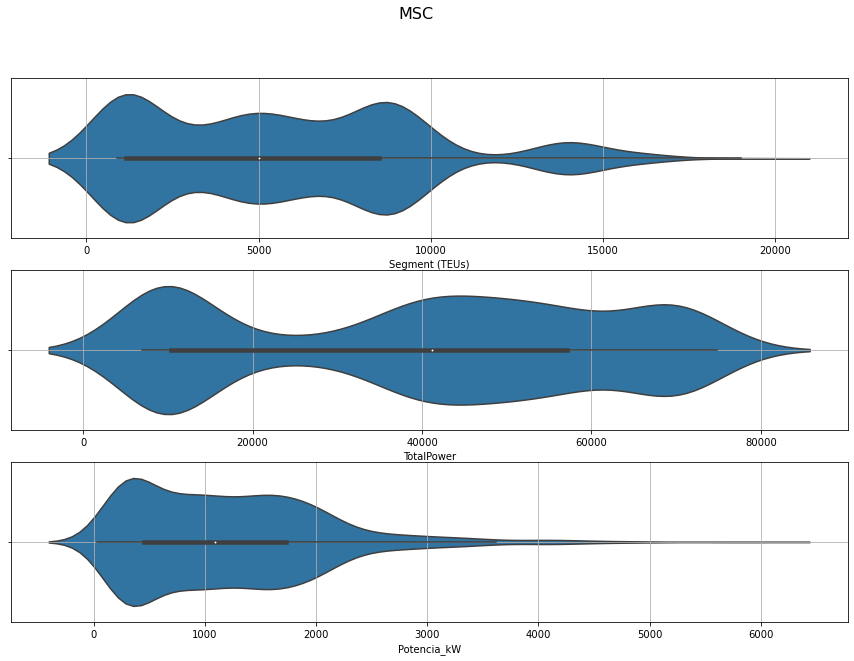

In [18]:
a = MSC_2018['Segment (TEUs)']
b = MSC_2018.TotalPower
c = MSC_2018.Potencia_kW

violin(a,b,c)

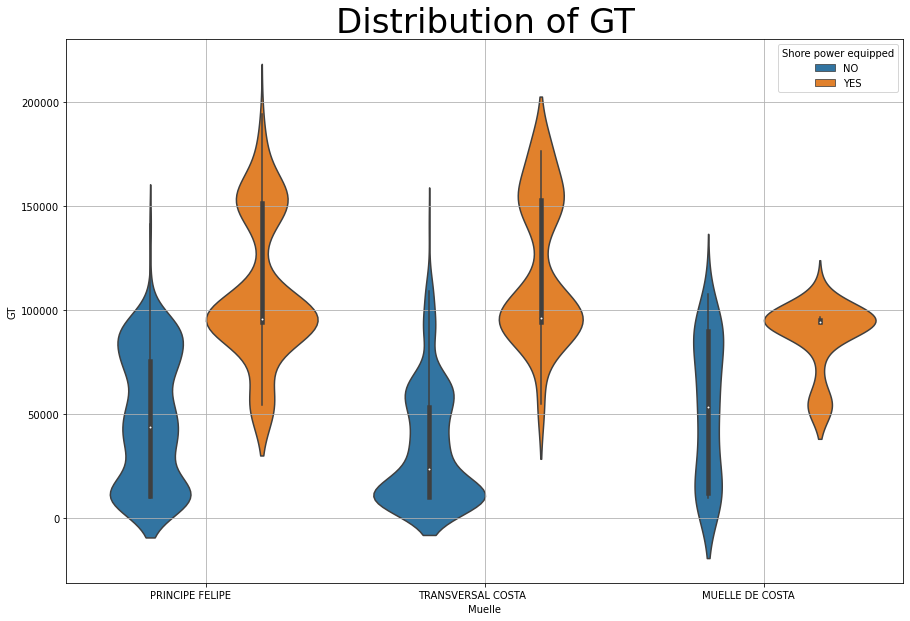

In [19]:
# violin plot (GT by OPS YES/NO and Muelle)

plt.figure(figsize=(15,10))
ax = sns.violinplot(x="Muelle", y="GT", hue="Shore power equipped", data=MSC_2018)#, split=True)
ax.set_title('Distribution of GT', fontsize=34)
ax.grid(True)

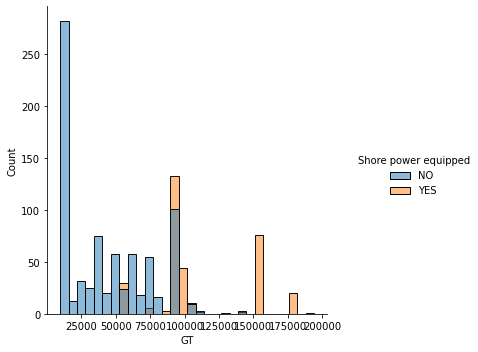

In [20]:
sns.displot(MSC_2018, x="GT", hue="Shore power equipped", bins = 30)

In [21]:
# función unique:
MSC_2018.Muelle.unique()

array(['PRINCIPE FELIPE          ', 'TRANSVERSAL COSTA        ',
       'MUELLE DE COSTA          '], dtype=object)

Text(0, 0.5, 'Power at berth (kW)')

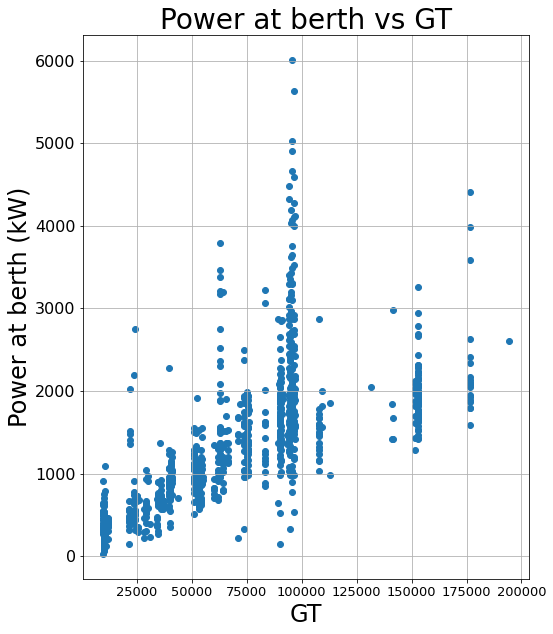

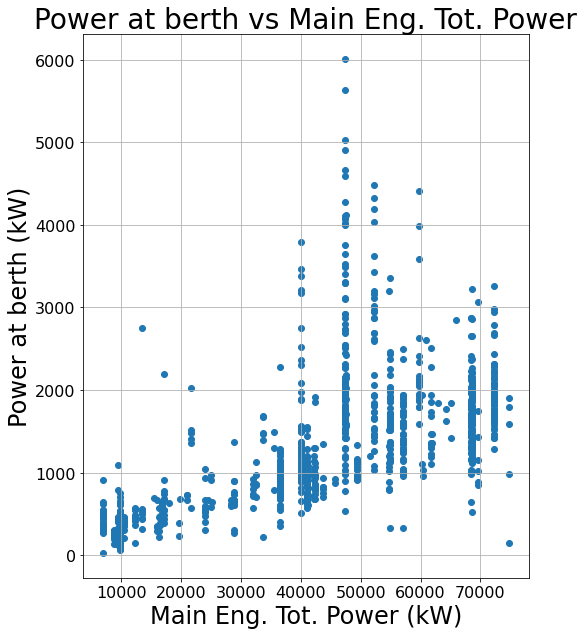

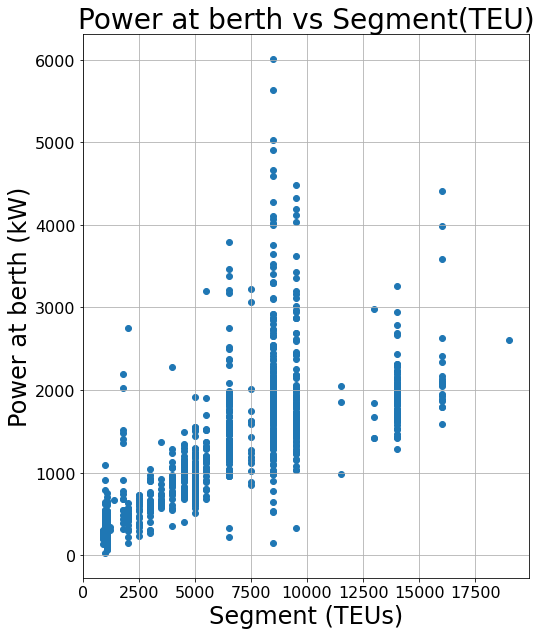

In [22]:
# scatter plots of Power at berth

# Power at berth vs GT
fig = figure(figsize=(8,10))
plt.scatter(MSC_2018.GT, MSC_2018.Potencia_kW)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.title('Power at berth vs GT',fontsize=28)
plt.xlabel('GT', fontsize=24)
plt.ylabel('Power at berth (kW)', fontsize=24)


# Power at berth vs Main Engines Total Power

fig = figure(figsize=(8,10))
plt.scatter(MSC_2018.TotalPower, MSC_2018.Potencia_kW)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Power at berth vs Main Eng. Tot. Power',fontsize=28)
plt.xlabel('Main Eng. Tot. Power (kW)', fontsize=24)
plt.ylabel('Power at berth (kW)', fontsize=24)


# Power at berth vs Segment(TEUs)

fig = figure(figsize=(8,10))
plt.scatter(MSC_2018['Segment (TEUs)'], MSC_2018.Potencia_kW)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Power at berth vs Segment(TEU)',fontsize=28)
plt.xlabel('Segment (TEUs)', fontsize=24)
plt.ylabel('Power at berth (kW)', fontsize=24)

## Simultaneidad

In [23]:
# simultaneidad MSC 2018

dfIN = MSC_2018[['FH. Amarre Calc','Potencia_kW']]
dfOUT = MSC_2018[['FH. Desamarre Calc','Potencia_kW']]

In [24]:
dfIN['direction'] = 1
dfOUT['direction'] = -1
dfIN.columns = ('TS','pot_media','direction')
dfOUT.columns = ('TS','pot_media','direction')

traffic_buques = pd.concat([dfIN, dfOUT]).sort_values('TS')
traffic_buques.pot_media = traffic_buques.pot_media*traffic_buques.direction
traffic_buques['ships'] = traffic_buques['direction'].cumsum()
traffic_buques['cum_pot'] = traffic_buques['pot_media'].cumsum()
traffic_buques = traffic_buques.round()

<ipython-input-24-9f362c39039c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIN['direction'] = 1
<ipython-input-24-9f362c39039c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOUT['direction'] = -1


In [27]:
# escalas que entran y salen
traffic_buques.head()

,pot_media,direction,ships,cum_pot
TS,,,,
2018-01-01 20:48:00,275.0,1,1,275.0
2018-01-02 05:28:00,1736.0,1,2,2011.0
2018-01-02 12:03:00,1924.0,1,3,3935.0
2018-01-02 21:53:00,-275.0,-1,2,3659.0
2018-01-03 08:58:00,-1736.0,-1,1,1924.0


Text(0.5, 1.0, 'cumpot (kW)')

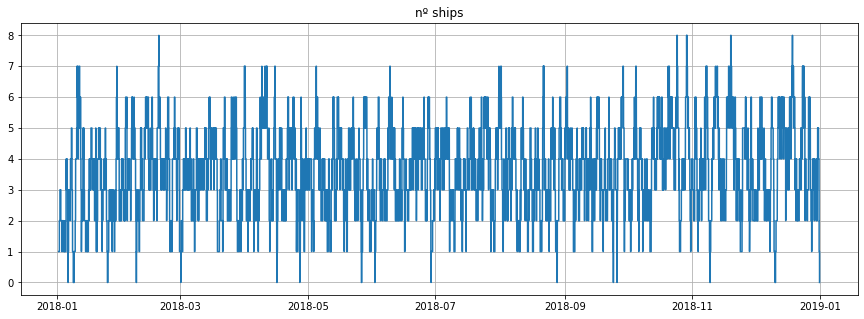

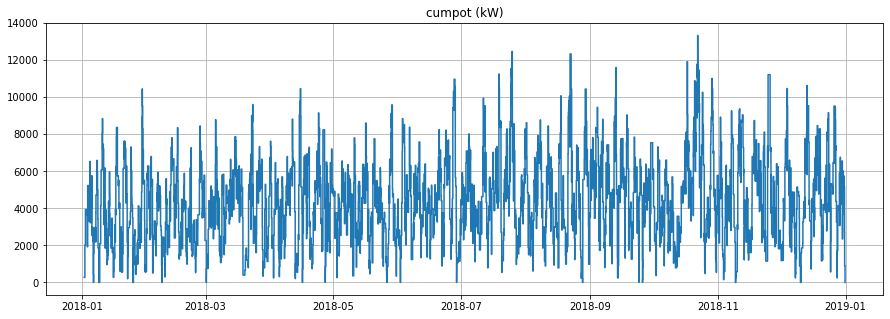

In [25]:
# plots de buques simultaneos y potencia acumulada

plt.figure(figsize=(15,5))
plt.step(traffic_buques.TS,traffic_buques.ships, where='post')
plt.grid(True)
plt.title('nº ships')
# plt.savefig(path + '\simultaneidad\simplots/' + each + '_ships.png', format="PNG")

plt.figure(figsize=(15,5))
plt.step(traffic_buques.TS,traffic_buques.cum_pot, where='post')
plt.grid(True)
plt.title('cumpot (kW)')
# plt.savefig(path + '\simultaneidad\simplots/' + each + '_cumpot.png', format="PNG")

In [26]:
# organización simultaneidad hora a hora

# milisegundos para evitar duplicados en las time series
traffic_buques.TS = traffic_buques.TS.astype('datetime64')+pd.to_timedelta(traffic_buques.groupby('TS').cumcount(), unit='ms')

# time series como índice
traffic_buques = traffic_buques.set_index('TS')

# descripción hora a hora
sim = pd.concat([traffic_buques.resample('1H').ffill().fillna(0).ships,
                 traffic_buques.resample('1H').ffill().fillna(0).cum_pot], axis=1)

# preparación para excel
sim.sort_values(by='cum_pot', inplace=True)

# paso de kW a MW
sim.cum_pot = sim.cum_pot/1000

# paso de nº horas a % del total de año
sim['int'] = range(1,len(sim)+1)
sim['percent'] = sim.int*100/len(sim)
sim.reset_index(inplace=True)
#     sim = pd.concat([sim2017,sim2018,sim2019], axis=1)
#     del sim2017, sim2018, sim2019

# lo guardamos en un nuevo excel (para hacer las gráficas unificadas con todas las otras de terminales, transporte terrestre, etc)
sim.to_excel("sim.xlsx")

In [30]:
# dataframe ordenado cronológicamente
sim.sort_values('TS').head(15)

,TS,ships,cum_pot,int,percent
0,2018-01-01 20:00:00,0.0,0.000,1,0.011448
91,2018-01-01 21:00:00,1.0,0.275,92,1.053234
92,2018-01-01 22:00:00,1.0,0.275,93,1.064682
89,2018-01-01 23:00:00,1.0,0.275,90,1.030338
86,2018-01-02 00:00:00,1.0,0.275,87,0.995993
88,2018-01-02 01:00:00,1.0,0.275,89,1.018890
85,2018-01-02 02:00:00,1.0,0.275,86,0.984545
90,2018-01-02 03:00:00,1.0,0.275,91,1.041786
93,2018-01-02 04:00:00,1.0,0.275,94,1.076131
87,2018-01-02 05:00:00,1.0,0.275,88,1.007441


# Save and load variables

In [ ]:
# no needed for short scripts, no needed now

In [ ]:
# save (save time without running data processing each time you open the notebook)

# %store MSC_2018
# %store MSC_2020

In [ ]:
# load variable

# %store -r MSC_2018
# %store -r MSC_2020